# Generating Random Variables

## Introduction  

In this section we'll cover the following methods for generating random numbers from a target distribution.

1. Uniform random samples

2. Transformation Method

3. Inverse Transform Method

4. Accept-Reject Method






## Pseudo-random samples  

One of the requirements for Monte Carlo methods is the ability to generate consistent *pseudo*-random samples from a specified probability distribution. One of the most fundamental tools is a uniform random number generater

- Applying transformations to uniform samples, we can sample from many different distributions

- Computers on their own can't generate *randomness*, but they can simulate what *random* may look like

In R, we can control how random samples are generated. For example, we can specify seed for random number generation, see the function [`set.seed`](https://stat.ethz.ch/R-manual/R-devel/library/base/html/Random.html)

- `set.seed` allows us to control the start and flow (*state*) of random number generation in a program

- Useful for reproducibility

- On StackOverflow: [Reasons for using the set.seed function](https://stackoverflow.com/questions/13605271/reasons-for-using-the-set-seed-function)


## Generation uniform samples 

Random number generation for statistical purposes heavily relies on the assumption that computational methods can consistently generate *independent* uniform random numbers.



In [245]:
import numpy as np
import matplotlib.pyplot as plt

## set style
plt.style.use("ggplot") ## use plt.style.availalbe to see all styles

def summary(data):
    """ To print out summary statistics"""
    titles = " Min.:, 1st Qu.:, Median:, 3rd Qu.:, Max.:".split(",")
    percentiles = np.round(np.percentile(a=data, interpolation='midpoint', q=[0.0, 0.25, 0.5, 0.75, 1.0]), 4)
    out = dict(zip(titles, percentiles))
    mean = np.round(np.mean(a = data) )
    out.update({" Mean:" : mean})
    for k, val in out.items():
        print(k, val)
    #return out

def table(data, prob=False):
    """Count unique values
    return a tuple(value, count)"""
    vals_counts = np.unique(ar=data, return_counts=True)
    if prob:
        density = vals_counts[1] / len(data)
        vals_counts = (vals_counts[0], density)
    out = tuple(zip(*vals_counts))
    return out

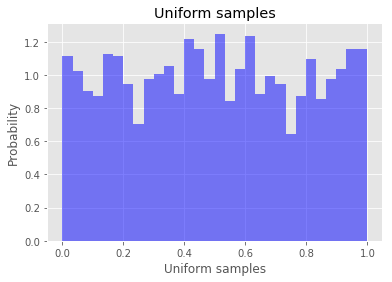

In [246]:
u = np.random.uniform(low=0,high=1,size=2000)
plt.hist(u, bins = 30, normed=1, color='blue', alpha = 0.5)
plt.title("Uniform samples")
plt.xlabel("Uniform samples")
plt.ylabel("Probability")
plt.show()

In [247]:
summary(u)

 Min.: 0.0005
 1st Qu.: 0.0031
 Median: 0.0057
 3rd Qu.: 0.0081
 Max.: 0.0118
 Mean: 1.0


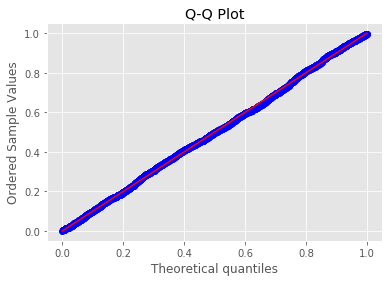

In [248]:
import scipy.stats as stats

stats.probplot(u, dist="uniform", plot=plt)
plt.ylabel("Ordered Sample Values")
plt.title("Q-Q Plot")
plt.show()


/home/jonathan/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


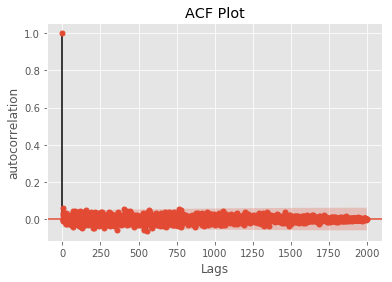

In [249]:
from statsmodels.graphics.tsaplots import plot_acf
#1. pandas
plot_acf(u)
plt.title("ACF Plot")
plt.xlabel("Lags")
plt.ylabel("autocorrelation")
plt.show()



## Generation uniform samples | References 

- [QQ Plot](http://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm)

- [Autocorrelation plot](http://www.itl.nist.gov/div898/handbook/eda/section3/autocopl.htm)



## Generation of uniform samples 

For a random variable $u \sim Unif(0,1)$, then $(1 - u) \sim Unif(0,1)$

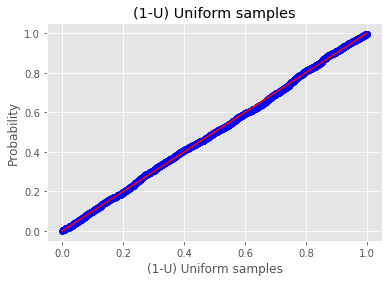

In [250]:
stats.probplot(u, dist="uniform", plot=plt)
plt.title("(1-U) Uniform samples")
plt.xlabel("(1-U) Uniform samples")
plt.ylabel("Probability")
plt.show()




It is important to generate samples that are not correlated with each other!



## Generation of uniform samples, pt. 2 

Once we can simulate $u \sim Unif(0,1)$, we can begin generating samples from other target distributions. How could we simulate $v \sim Unif(0,10)$? Well, we could simply include a multiplicative constant such that $v = 10 \times u$.


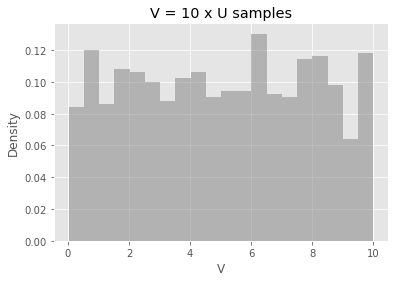

 Min.: 0.026
 1st Qu.: 0.0539
 Median: 0.0963
 3rd Qu.: 0.1463
 Max.: 0.1558
 Mean: 5.0


In [251]:
v = 10 * np.random.uniform(low=0.0, high=1.0, size = 1000)
plt.hist(v, bins=20, color = "gray", alpha = 0.5, normed=True)
plt.title("V = 10 x U samples")
plt.xlabel("V")
plt.ylabel("Density")
plt.show()

summary(v)

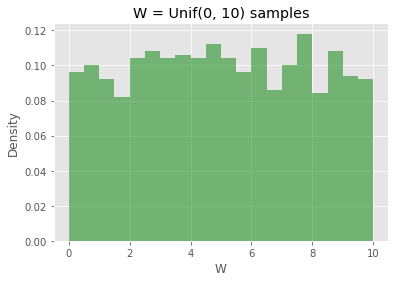

 Min.: 0.004
 1st Qu.: 0.0568
 Median: 0.0681
 3rd Qu.: 0.0904
 Max.: 0.1113
 Mean: 5.0


In [252]:
w = np.random.uniform(low=0.0, high=10.0, size = 1000)
plt.hist(w, bins=20, color = "green", alpha = 0.5, normed=True)
plt.title("W = Unif(0, 10) samples")
plt.xlabel("W")
plt.ylabel("Density")
plt.show()

summary(w)

## Transformation Methods 

- Distributions sometimes share direct relationships. 
- If the relationship between the instrumental and target distribution is simple, then we can exploit it to generate random variables from the target distribution
- We can sample from an "easy to simulate" distribution and then transform those random samples to generate samples from a "difficult to simulate" distribution. 

To review some common relationships see the following: [Relationships among probability distributions][4]

- Some easy *instrumental* distributions which are easy to sample from include $Unif(a,b)$, $Exp(\theta)$. 

- Some distributions that are more difficult to sample from include the $N(\mu, \sigma)$ and **MVN**  distributions.


## Example: Binomial samples 

Another use of generating samples $U \sim U(0,1)$ is to generate Bernoulli. Once we've generated $n$ Bernoulli samples, we can sum the Bernouilli samples to generate Binomial samples. Reference: [Notes](http://www.stat.ufl.edu/~abhisheksaha/sta4321/lect12.pdf)

$$
u \sim Unif(0,1) \\
x  = I(u \leq p) \text{ such that } x \sim Bernoulli(p) \\
y = \sum_{i=1}^n x_i \text{ such that } y \sim Bin(n,p) \\
$$


In [253]:
## let's simulate 10,000 samples from bin(n=10, p = 0.3)
N = 10000 ## number of Unif and Binomial samples
n = 10 ## number of bernoulli trials for each bernoulli sample
p = 0.3 ## theoretical p
u = np.random.rand(n*N)
x = 1*(u <= p) ## multiply by 1 to convert bools to ints
x = np.reshape(a = x, newshape= (N, n), order='F') ## array to Nxn array

In [254]:
x ## bernoulli samples

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

In [255]:
Binom_samples = x.sum(axis = 1) ## sum by rows
print("Shape: " + str(Binom_samples.shape)) ## number of samples
print("Samples: " + str(Binom_samples))
summary(Binom_samples)

Shape: (10000,)
Samples: [1 3 2 ..., 4 3 3]
 Min.: 0.0
 1st Qu.: 0.0
 Median: 0.0
 3rd Qu.: 0.0
 Max.: 0.0
 Mean: 3.0


In [257]:
#plt.subplot ## subplot(nrows, ncols, plot_number)

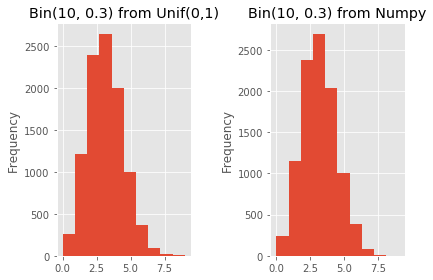

In [258]:
plt.subplot(1, 2, 1) ## plot 1
plt.hist(bins= 10, x=Binom_samples)
plt.title('Bin(10, 0.3) from Unif(0,1)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) ## plot 2
plt.hist(bins = 10,
         x = np.random.binomial(n = 10, p = 0.3, size= N))
plt.title('Bin(10, 0.3) from Numpy')
plt.ylabel('Frequency')

plt.tight_layout() ## tight layout
# https://matplotlib.org/users/tight_layout_guide.html
plt.show()


## Inverse Transform Method 

The inverse transform method is a simple algorithm for generating random variables $x$ from a *continuous* target distribution $f(x)$ using random samples from a $Unif(0,1)$ distribution.

General idea: evaluate random variables $u \sim Unif(0,1)$ using the inverse CDF of the target distribution for which you wish to simulate from. See the following link for further discussion: [How does the inverse transform method work?][1]

**Theorem (Probability Integral Transformation): **
If $X$ is a *continuous* random variable with CDF $F_X(X)$, then $U = F_X(X) \sim Unif(0,1)$. If $U \sim Unif(0,1)$, then for all $x \in \mathbb R$

$$
\begin{aligned}
P(F_X^{-1}(U) \leq x) & = P(\inf\{t: F_X(t) = U\} \leq x)\\
\\ & = P(U \leq F_X(x))\\
\\ & =F_U(F_X(x)) \\
\\ & = F_X(x) = P(X \leq x)
\end{aligned}
$$
and therefore $F_X^{-1}(U)$ has the same distribution as $X$.




## Inverse Transform Method, pt. 2 


Algorithm:

1. For target probability density function (*pdf*) $f(X)$, calculate the CDF, $F(X)$

2. Set the CDF equal to $U$, $F(X) = U$, then solving for $X$, obtaining $F^{-1}(U) = X$

2. Generate $n$ random variables from $u \sim Unif(0,1)$

3. Plug in $u$ observed values in $F^{-1}(U = u)$ to obtain $n$ values for which $x \sim f(X)$



## Example: Exponential distribution 

Suppose we are interested in generating $n = 10,000$ random values from an Exponential distribution 

1. $f(X) = \lambda e^{- \lambda X}$

2. $F(X) = 1 - e^{- \lambda X} = U$

3. $F^{-1}(U) = - 1/\lambda \ log(1 - U)$; can use $(1-u)$ or $u$, since both are uniformly distributed.

If we set $\lambda = 5$, then


In [259]:
N = 10**4
u = np.random.rand(N) ## uniform samples
#rate = 5
fInv = lambda u: -(1/5) * np.log(u)

outSamples = fInv(u)
summary(outSamples)

 Min.: 0.0001
 1st Qu.: 0.0004
 Median: 0.0009
 3rd Qu.: 0.0014
 Max.: 0.0018
 Mean: 0.0


In [260]:
print("Inverse Transform")
summary(outSamples)


randsamples = np.random.exponential(scale= 1/5, size= N)
## scale  = 1/rate
print("\nNumpy")
summary(randsamples)

Inverse Transform
 Min.: 0.0001
 1st Qu.: 0.0004
 Median: 0.0009
 3rd Qu.: 0.0014
 Max.: 0.0018
 Mean: 0.0

Numpy
 Min.: 0.0
 1st Qu.: 0.0006
 Median: 0.0013
 3rd Qu.: 0.0019
 Max.: 0.0024
 Mean: 0.0


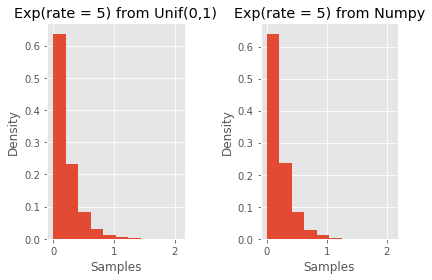

In [261]:
outSamples
## Example: Exponential distribution, pt. 2 

plt.subplot(1, 2, 1) ## subplot 1
w1 = np.ones_like(outSamples)/len(outSamples) ## normalizing weights
plt.hist(outSamples, weights=w1)
plt.xlabel("Samples")
plt.title("Exp(rate = 5) from Unif(0,1)")
plt.ylabel("Density")


plt.subplot(1, 2, 2) ## subplot 2
w2 = np.ones_like(randsamples)/len(randsamples) ## normalizing weights
plt.hist(randsamples, weights=w2)
plt.title("Exp(rate = 5) from Numpy")
plt.xlabel("Samples")
plt.ylabel("Density")

plt.tight_layout()
plt.show()




## Example: Pareto Distribution 

For information on the Pareto distribution, please see: [Pareto Distribution][3]

The $Pareto(a,b)$ distribution has CDF $F(X \leq x) = 1 - (\frac{b}{x})^a$ for $x \geq b > 0, \ a > 0$


1. First set $F(x) = U$, where $U \sim Unif(0,1)$, then solve for $X$
$$
\displaystyle
\begin{aligned}
1 - \left( \frac{b}{x} \right)^2 & = U \\
\ \left(\frac{b}{x} \right)^a & = 1 - U \\
\  \frac{b}{x} & = (1 - U)^{1/a} \\
\ x & = b \times (1 - U)^{-1/a} \\
\ & = F_X^{-1}(U) \\
\end{aligned}
$$



## Example: Pareto Distribution, pt. 2 


```{r}
set.seed(123)
n = 1000
U =runif(n)
a = 3
b = 2
X = b*(1-U)^(-1/a)
pareto = function(x){(a*(b^a)/x^(a+1))}

summary(X)

```

In [262]:
#np.random.seed(123)
n = N ## sample size
U = np.random.uniform(size=n, low=0, high=1) ## uniform samples
a = 3
b = 2
X = b*(1 - U)**(-1/a)
pareto = lambda x: a*(b**a) / x**(a+1)
summary(X)

 Min.: 2.0
 1st Qu.: 2.0018
 Median: 2.0034
 3rd Qu.: 2.0053
 Max.: 2.0069
 Mean: 3.0


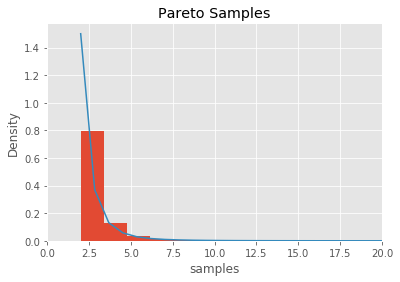

In [263]:
w = np.ones_like(a = X) / len(X) ## normalizing weights
plt.hist(x = X, bins= 30, weights = w)

x2 = np.linspace(2.0, max(X))
y2 = pareto(x2)
plt.plot(x2, y2)

plt.xlim((0, 20))
plt.title("Pareto Samples")
plt.xlabel("samples")
plt.ylabel("Density")

plt.show()

## Inverse Transform Discrete scenario 

For a given ordered discrete random sample $x_1 < ... < x_{i-1} < x_{i} < x_{i+1} < ...< x_n$ from a distribution $f(X)$, with CDF $F(x)$. Then, the inverse transformation $F_X^{-1}(u) = x_i$, where $F_X(x_{i-1}) < u \leq F_X(x_i)$. Then for each random variable desired

1. Generate a random variable $u \sim Unif(0,1)$

2. Deliver $x_i$ where $F(x_{i-1}) < u \leq F(x_{i})$



As an example, take the following distribution $P(X = 0) = 0.1$, $P(X = 1) = 0.2$, $P(X = 2) = 0.2$, $P(X = 3) = 0.2$, and $P(X = 4) = 0.3$, use the inverse transform method to generate a random sample of size 1000 from the distribution.

$$
F(X \leq x) = 
\begin{cases}
    0.1       & \quad  \text{if } x \leq 0 \\
    0.3       & \quad  \text{if } x \leq 1\\
    0.5       & \quad  \text{if } x \leq 2\\
    0.7       & \quad  \text{if } x \leq 3\\
    1.0       & \quad  \text{if } x \leq 4\\
  \end{cases}
$$



## Inverse Transform Discrete scenario, pt. 2 

In [264]:
n = 10**4
u = np.random.uniform(size=n, low = 0, high = 1)

def fInv(v):
    if v <= 0.1:
        x = 0
    elif v > 0.1 and v <= 0.3:
        x = 1
    elif v > 0.3 and v <= 0.5:
        x = 2
    elif v > 0.5 and v <= 0.7:
        x = 3
    else:
        x = 4
    return x

vFInv = np.vectorize(pyfunc=fInv) ## vectorize for performance

In [265]:
results = vFInv(u) ## discrete inverse transform results
results_table = table(results, prob=True)
print(results_table)

((0, 0.1002), (1, 0.20380000000000001), (2, 0.19700000000000001), (3, 0.1963), (4, 0.30270000000000002))


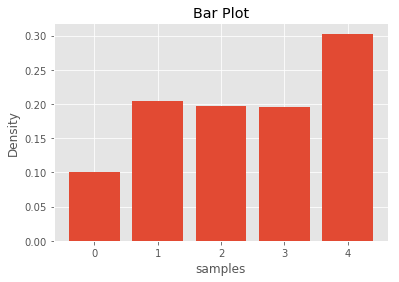

In [266]:
vals, density = tuple(zip(*results_table)) ## unzip tuple

plt.bar(left = vals, height=density)
plt.title("Bar Plot")
plt.ylabel("Density")
plt.xlabel("samples")
plt.show()


$P(X = 0) = 0.1$, $P(X = 1) = 0.2$, $P(X = 2) = 0.2$, $P(X = 3) = 0.2$, and $P(X = 4) = 0.3$


## Accept-Reject  

For notes on the Accept-Rejection algorithm see [Accept-Reject](http://www.columbia.edu/~ks20/4703-Sigman/4703-07-Notes-ARM.pdf)

Suppose that $X$ and $Y$ are random variables with density (or pmf) $f$ and $g$ respectively, and there exists a constant $M$ such that

$$
M \geq \frac{f(t)}{g(t)}
$$

or

$$
M \times g(t) \geq f(t)
$$
for all t such that $f(t) > 0$. If we'd like to simulate from the target density $f(t)$, then the following algorithm can be applied to generate the random variable $X$.




## The Accept-Reject Algorithm 

To generate $n$ samples, `for(i in 1:n)`

  1. Generate $Y \sim g_Y(t)$ and $U \sim Unif(0,1)$

  2. If $U \leq \frac{f(Y)}{M \times g(Y)}$ then we accept $Y$, such that $Y =  X$

  3. Repeat until you have sufficient samples



In order for the algorithm to work we require the following constraings:

1. $f$ and $g$ have to have compatible supports (i.e. $g(x) > 0$ when $f(x) > 0$)

2. There is a constant $M$ such that $\frac{f(t)}{g(t)} \leq M$



## Example: Beta(2,2) 

Suppose we'd like to generate samples from $Beta(2,2)$ distribution. The density function for $Beta(2,2)$ is simply $f(x) = 6x(1 - x)$ for $0 < x < 1$. Since our domain is between 0 and 1, we can use a simple $Unif(0,1)$ density as our instrumental density, $g$. Then, by the accept-reject algorithm we can simulate a random variable $Y \sim g$, and a random variable $U \sim Unif(0,1)$. Then, if 
$$
M \times U \leq \frac{f(Y)}{ g(Y)}
$$
we accept the candidate variable $Y \sim g$ as $X$, $X = Y$. Otherwise, we reject $Y$ and simulate again until we get an appropriate sample size. 


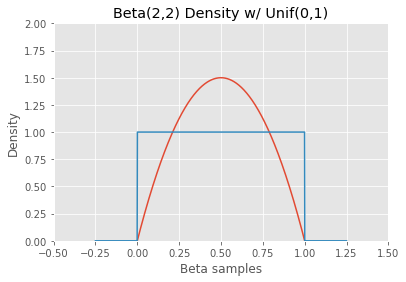

In [267]:
beta = lambda x: 6*x*(1 - x)
M = 1.5

#plt.subplot(1, 2, 1)
x1 = np.linspace(start=-0.25, stop=1.25, num=1000)
y1 = beta(x1)

plt.plot(x1, y1)
plt.title("Beta(2,2) Density w/ Unif(0,1)")
plt.ylabel("Density")
plt.xlabel("Beta samples")
plt.xlim((-0.5, 1.5))
plt.ylim((0,2))

unif = lambda x: 1 if (x >= 0 and x <= 1) else 0
vUnif = np.vectorize(unif)
y2 = vUnif(x1)
plt.plot(x1, y2)

plt.show()


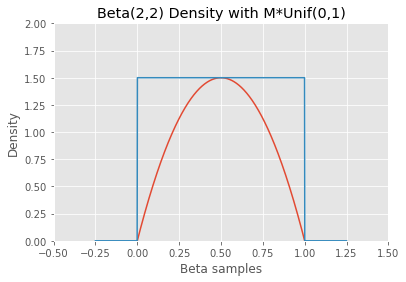

In [268]:
x1 = np.linspace(start=-0.25, stop=1.25, num=1000)
y1 = beta(x1)
M = 1.5

plt.plot(x1, y1)
plt.title("Beta(2,2) Density with M*Unif(0,1)")
plt.ylabel("Density")
plt.xlabel("Beta samples")
plt.xlim((-0.5, 1.5))
plt.ylim((0,2))

unif = lambda x: 1 if (x >= 0 and x <= 1) else 0
vUnif = np.vectorize(unif)
y2 = vUnif(x1) * M ## M * Uniform
plt.plot(x1, y2)

plt.show()



## Example: Beta(2,2), pt. 2 


Note that the target density $f$ has a maximum of 1.5, so we can set M = 1.5; see: [Max of Beta(2,2)](http://www.wolframalpha.com/input/?i=max+6x(1+-+x))


Now, say we needed $n = 10,000$ samples from $Beta(2,2)$, then a better implementation would be

```{r}
X = rep(NA, n); M = 1.5
i = 0 ## index set to start at 0
while(sum(is.na(X))){
  U = runif(1); Y = runif(1)
  accept <- U <= f(Y)/(M*g(Y))
  if(accept){
    i = i+1 ## update the index
    X[i] <- Y
  }
}

round(summary(X), 4)
round(qbeta(p = c(0, 0.25, 0.5, 0.75, 1), 2, 2), 4)
```


In [269]:
n = 2000
M = 1.5
f = lambda x: 6*x*(1 - x) ## pdf of Beta(2,2)
unif = lambda x: 1 if (x >= 0 and x <= 1) else 0
vUnif = np.vectorize(unif)
g = vUnif ## pdf of Unif(0,1) is just 1

x = np.zeros(n) * np.nan
i = 0
iters = 0
while sum(np.isnan(x)) > 0:
    iters += 1
    U = np.random.rand(1)
    Y = np.random.rand(1)
    accept = np.bool(U * M <= f(Y)/g(Y))
    if accept:
        x[i] = Y
        i += 1


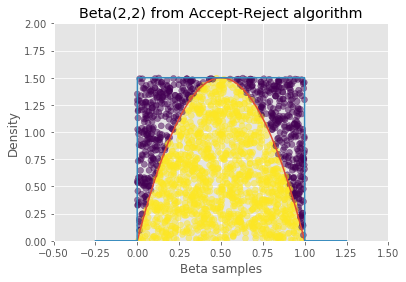

In [270]:
x1 = np.linspace(start=-0.25, stop=1.25, num=1000)
y1 = beta(x1)
M = 1.5

plt.plot(x1, y1)
plt.title("Beta(2,2) from Accept-Reject algorithm")
plt.ylabel("Density")
plt.xlabel("Beta samples")
plt.xlim((-0.5, 1.5))
plt.ylim((0,2))

unif = lambda x: 1 if (x >= 0 and x <= 1) else 0
vUnif = np.vectorize(unif)
y2 = vUnif(x1) * M ## M * Uniform
plt.plot(x1, y2)



x3 = np.random.rand(n)
y3 = np.random.rand(n) * M
accept = (y3 <= f(x3)) + 4
plt.scatter(x=x3, y = y3, alpha=0.5, c=accept)

plt.show()




[1]: https://stats.stackexchange.com/questions/184325/how-does-the-inverse-transform-method-work
[2]: http://www.math.uah.edu/stat/special/Rayleigh.html
[3]: http://www.math.uah.edu/stat/special/Pareto.html
[4]: https://en.wikipedia.org/wiki/Relationships_among_probability_distributions
[5]: http://www.math.uah.edu/stat/special/ChiSquare.html
[6]: http://www.math.uah.edu/stat/special/Gamma.html
[7]: http://www.math.uah.edu/stat/special/Beta.html